In [0]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

1.13.1


In [0]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


In [0]:
train_images.shape

(60000, 28, 28)

In [0]:
print(len(fashion_mnist.load_data()[0][0][0][0]))

28


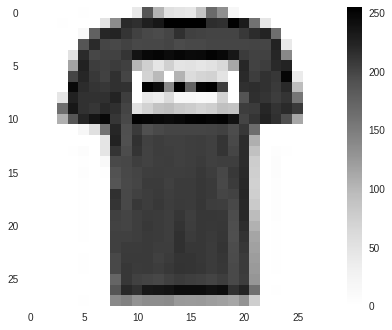

In [0]:
plt.figure()
plt.imshow(train_images[1])
plt.colorbar()
plt.grid(False)
plt.show()

In [0]:
train_images=train_images/255
test_images=test_images/255

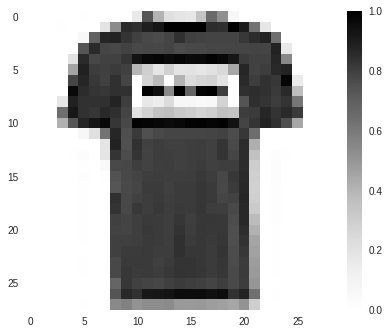

In [0]:
plt.figure()
plt.imshow(train_images[1])
plt.colorbar()
plt.grid(False)
plt.show()

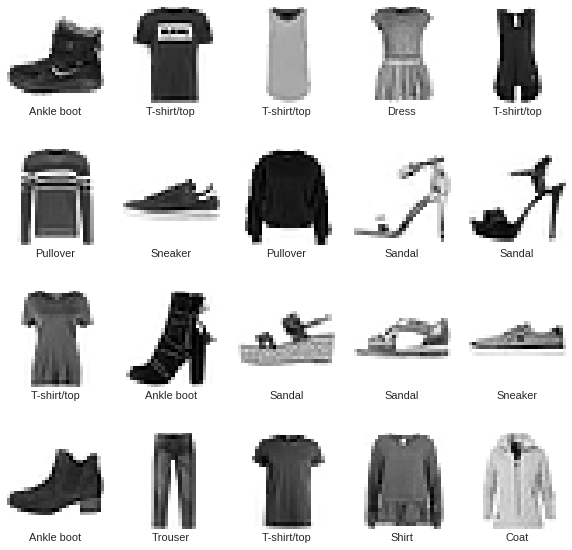

In [0]:
plt.figure(figsize=(10,10))
for i in range(20):
  plt.subplot(4,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i],cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])
plt.show()  
  

In [0]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(1000,activation=tf.nn.relu),
    keras.layers.Dense(1000,activation=tf.nn.relu),
    keras.layers.Dense(500,activation=tf.nn.relu),
    keras.layers.Dense(200,activation=tf.nn.relu),
    keras.layers.Dense(10,activation=tf.nn.softmax)
]
)

Instructions for updating:
Colocations handled automatically by placer.


In [0]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [0]:
model.fit(train_images,train_labels,epochs=6)

Epoch 1/6
60000/60000 [==============================] - 76s 1ms/sample - loss: 0.5474 - acc: 0.7919
Epoch 2/6
60000/60000 [==============================] - 79s 1ms/sample - loss: 0.3677 - acc: 0.8648
Epoch 3/6
60000/60000 [==============================] - 79s 1ms/sample - loss: 0.3325 - acc: 0.8772
Epoch 4/6
60000/60000 [==============================] - 77s 1ms/sample - loss: 0.3086 - acc: 0.8863
Epoch 5/6
60000/60000 [==============================] - 79s 1ms/sample - loss: 0.2899 - acc: 0.8914
Epoch 6/6
60000/60000 [==============================] - 78s 1ms/sample - loss: 0.2745 - acc: 0.8977


In [0]:
test_loss,test_acc=model.evaluate(test_images,test_labels)

10000/10000 [==============================] - 2s 224us/sample - loss: 0.3501 - acc: 0.8770


In [0]:
print(test_loss,test_acc)

0.34438476135730745 0.8786


In [0]:
weights=[layer.get_weights() for layer in model.layers]
weights_cp=weights.copy()
print(weights_cp)

[[], [array([[-3.2781236e-02,  0.0000000e+00, -8.8346479e-03, ...,
         1.3394439e-02,  0.0000000e+00,  1.3253291e-01],
       [ 2.9537397e-02,  0.0000000e+00, -2.2391256e-02, ...,
         3.3549163e-02,  0.0000000e+00,  6.4034306e-02],
       [ 2.7466508e-02, -2.1736012e-05,  1.7435826e-02, ...,
         8.4929720e-02,  0.0000000e+00,  1.9456139e-01],
       ...,
       [-2.5279792e-02,  2.4555586e-02, -2.7869912e-02, ...,
        -3.6753365e-04,  1.5059195e-03, -2.4829288e-01],
       [-3.1086104e-02,  9.9472543e-03,  7.8773452e-03, ...,
        -2.3190415e-02,  4.4857705e-04, -1.9359441e-01],
       [ 2.9658715e-03,  0.0000000e+00,  8.7723164e-03, ...,
        -1.9574574e-01,  0.0000000e+00, -8.1911713e-02]], dtype=float32), array([ 1.80701852e-01,  9.11902711e-02, -5.48363663e-02, -3.68724875e-02,
        1.84448361e-01, -4.18252125e-02,  2.50697613e-01,  1.29166162e-02,
        6.03187047e-02,  4.12018932e-02,  3.91242318e-02,  1.34281993e-01,
        2.35065237e-01,  1.75773

In [0]:
import math
def sort(weight):
  weight_full=[]
  for w in range(1,5):
    if(w==1):
      for i in range(784):
        for l in weight[w][0][i]:
          weight_full.append(l)
    if(w==2 or w==3):
      for j in range(1000):
        for l in weight[w][0][j]:
          weight_full.append(l)
    if(w==4):
      for x in range(500):
        for l in weight[w][0][x]:
          weight_full.append(l)
  weight_full.sort()
  return weight_full

  

  
    

In [0]:
def wt_prune(weight,k):
  weight_full=[]
  weight_full=sort(weights_cp)
  count=0
  k=math.floor((k*3284/100)+1)
  print('weight_full',weight_full[k])
  for w in range(1,5):
    if(w==1):
      for i in range(784):
        for l in range(1000):
          if(weight[w][0][i][l]<weight_full[k]):
            weight[w][0][i][l]=0
            count=count+1
            #print('heyy',weight[w][0][i][l])
    if(w==2):
      for j in range(1000):
        for l in range(1000):
          if(weight[w][0][j][l]<weight_full[k]):
            weight[w][0][j][l]=0
            count=count+1
            #print('heyy',weight[w][0][j][l])
    if(w==3):
      for j in range(1000):
        for l in range(500):
          if(weight[w][0][j][l]<weight_full[k]):
            weight[w][0][j][l]=0
            count=count+1
            #print('heyy',weight[w][0][j][l])
    if(w==4):
      for x in range(500):
        for l in range(200):
          if(weight[w][0][x][l]<weight_full[k]):
            weight[w][0][x][l]=0
            count=count+1
            #print('heyy',weight[w][0][x][l])
            #print(4)
  for i in range(6):
    model.layers[i].set_weights(weight[i])
    #print('yo')
  #model.fit(train_images,train_labels,epochs=6)
  test_loss,test_acc=model.evaluate(test_images,test_labels)
  print(test_loss,test_acc,count/len(weight_full))
  return (count/len(weight_full),test_acc)

In [0]:

def wt_graph():
  lst=[0,25,50,60,70,80,90,95,97,99]
  X_sparse=[]
  Y_acc=[]
  for i in lst:
    weights_cp=weights.copy()
    tup=wt_prune(weights_cp,i)
    X_sparse.append(tup[0])
    Y_acc.append(tup[1])
  plt.plot(X_sparse,Y_acc)
  plt.show()

weight_full -0.93409747
10000/10000 [==============================] - 3s 254us/sample - loss: 0.3437 - acc: 0.8788
0.3437415231227875 0.8788 4.1946308724832216e-07
weight_full -0.4083478
10000/10000 [==============================] - 2s 246us/sample - loss: 0.3699 - acc: 0.8624
0.3698992513656616 0.8624 0.0003447986577181208
weight_full -0.32737616
10000/10000 [==============================] - 3s 253us/sample - loss: 0.4349 - acc: 0.8495
0.43487495021820066 0.8495 0.0006891778523489933
weight_full -0.2854631
10000/10000 [==============================] - 2s 250us/sample - loss: 0.5069 - acc: 0.8286
0.5068913734436035 0.8286 0.000826761744966443
weight_full -0.2593953
10000/10000 [==============================] - 2s 248us/sample - loss: 0.6167 - acc: 0.7939
0.6166780107498169 0.7939 0.0009643456375838926
weight_full -0.23855852
10000/10000 [==============================] - 2s 249us/sample - loss: 0.7105 - acc: 0.7636
0.7104580176353454 0.7636 0.0011023489932885907
weight_full -0.222

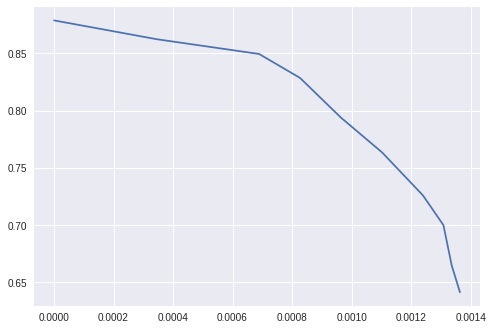

In [0]:
wt_graph()

In [0]:
def unt_prune(weight,k):
  l2norm=[]
  l2norm.append([])
  count=0
  k=math.floor((k*3284/100)+1)
  for w in range(1,5):
    summ=0
    if(w==1):
      l2norm.append([math.sqrt(sum(weight[w][0][i]**2)) for i in range(784)])
    if(w==2):
      l2norm.append([math.sqrt(sum(weight[w][0][i]**2)) for i in range(1000)])
    if(w==3):
      l2norm.append([math.sqrt(sum(weight[w][0][i]**2)) for i in range(1000)])
    if(w==4):
      l2norm.append([math.sqrt(sum(weight[w][0][i]**2)) for i in range(500)])
    
  norm_mat=[]
  for i in l2norm:
    for j in i:
      norm_mat.append(j)
  print(len(norm_mat))
  norm_mat.sort()
  print(k,norm_mat[k])
  prune_nrns=[]
  for i in range(len(l2norm)):
    for j in range(len(l2norm[i])):
      if(l2norm[i][j]<norm_mat[k]):
        prune_nrns.append([i,j])
  print(prune_nrns)
  for x in prune_nrns:
    for y in range(len(weight[x[0]][0][x[1]])):
      weight[x[0]][0][x[1]][y]=0
  for i in range(6):
    model.layers[i].set_weights(weight[i])
    #print('yo')
  #model.fit(train_images,train_labels,epochs=6)
  test_loss,test_acc=model.evaluate(test_images,test_labels)       
  return(len(prune_nrns)/len(norm_mat),test_acc)
  
      

In [0]:
def unt_graph():
  lst=[0,25,50,60,70,80,90,95,97,99]
  X_sparse=[]
  Y_acc=[]
  for i in lst:
    weights_cp=weights.copy()
    tup=unt_prune(weights_cp,i)
    X_sparse.append(tup[0])
    Y_acc.append(tup[1])
  plt.plot(X_sparse,Y_acc)
  plt.show()

3284
1 0.0
[]
10000/10000 [==============================] - 2s 229us/sample - loss: 0.3501 - acc: 0.8770
3284
822 0.22513063854033746
[[2, 23], [2, 33], [2, 53], [2, 54], [2, 56], [2, 61], [2, 64], [2, 69], [2, 71], [2, 76], [2, 81], [2, 83], [2, 88], [2, 92], [2, 98], [2, 99], [2, 106], [2, 110], [2, 119], [2, 124], [2, 136], [2, 137], [2, 141], [2, 146], [2, 153], [2, 160], [2, 162], [2, 168], [2, 173], [2, 182], [2, 183], [2, 184], [2, 190], [2, 192], [2, 195], [2, 197], [2, 220], [2, 221], [2, 227], [2, 237], [2, 247], [2, 258], [2, 265], [2, 267], [2, 270], [2, 277], [2, 279], [2, 288], [2, 290], [2, 296], [2, 309], [2, 328], [2, 332], [2, 334], [2, 335], [2, 338], [2, 343], [2, 353], [2, 354], [2, 357], [2, 360], [2, 361], [2, 365], [2, 380], [2, 389], [2, 391], [2, 393], [2, 395], [2, 401], [2, 403], [2, 405], [2, 409], [2, 410], [2, 417], [2, 421], [2, 426], [2, 432], [2, 434], [2, 443], [2, 444], [2, 449], [2, 452], [2, 458], [2, 460], [2, 466], [2, 471], [2, 482], [2, 489], 

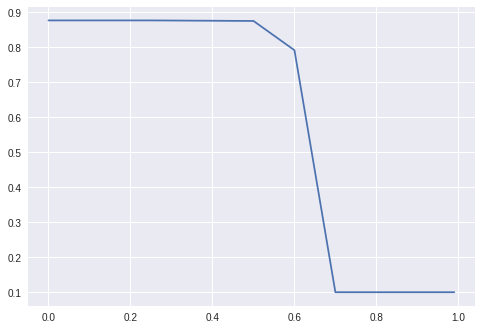

In [0]:
unt_graph()